In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

## Load the dataset

In [2]:
df = pd.read_csv('../Datasets/Accelerating_particle.csv')

## Explore the dataset

In [3]:
df.head()

,t,z
0,0.00000,0.581492
1,0.01001,0.109580
2,0.02002,0.736652
3,0.03003,1.485984
4,0.04004,1.743183


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,t,z
count,1000.000000,1000.000000
mean,5.000000,17.649912
std,2.891085,14.983189
min,0.000000,-1.356662
25%,2.500000,3.992397
50%,5.000000,13.412407
75%,7.500000,29.009230
max,10.000000,51.253266


## Plot the data set

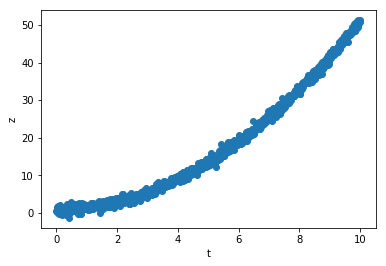

In [6]:
plt.scatter(df['t'],df['z'])
plt.xlabel('t')
plt.ylabel('z')
plt.show()

## Split into train and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['t']], df['z'], test_size=0.33, random_state=0)

## Scale the features

In [8]:
scaler = MinMaxScaler()
x_train_r = scaler.fit_transform(x_train)
x_test_r = scaler.transform(x_test)

## Train the model

In [9]:
model = SVR(kernel='poly',degree=2)
model.fit(x_train_r, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Make predictions

In [10]:
x_fine = np.linspace(0,1,100).reshape(-1,1)
y_fine = model.predict(x_fine)

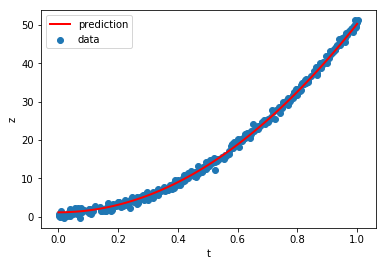

In [11]:
plt.scatter(x_test_r,y_test, label='data')
plt.plot(x_fine,y_fine,c='r',lw=2,label='prediction')
plt.xlabel('t')
plt.ylabel('z')
plt.legend()
plt.show()

## Compare data with prediction

In [12]:
y_pred = model.predict(x_test_r)

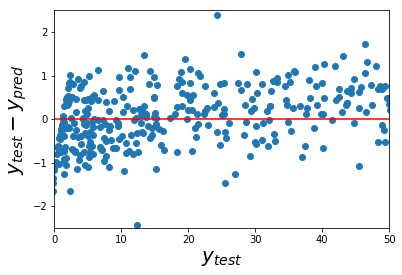

In [13]:
plt.scatter(y_test, (y_test - y_pred))
plt.plot([0,50],[0,0],c='r')
plt.xlim([0,50])
plt.xlabel('$y_{test}$',fontsize=20)
plt.ylabel('$y_{test}-y_{pred}$',fontsize=20)
plt.ylim([-2.5,2.5])
plt.show()

## Evaluate the model

In [14]:
model.score(x_test_r,y_test)

0.99802527948385378